In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RF

In [2]:
df = pd.read_csv(r"C:\BeCode\computervisionData\HAM10000_skin_mnist\HAM10000_metadata.csv")

In [3]:
df.shape

(10015, 7)

In [4]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
df['concern'] = df['dx'].apply(lambda x : 0 if ((x == 'nv') | (x == 'bkl') | (x == 'df') | (x == 'vasc')) else 1)

In [6]:
# lesion_type_dict = {
#     'nv': 'Melanocytic nevi',
#     'mel': 'Melanoma',
#     'bkl': 'Benign keratosis-like lesions ',
#     'bcc': 'Basal cell carcinoma',
#     'akiec': 'Actinic keratoses',
#     'vasc': 'Vascular lesions',
#     'df': 'Dermatofibroma'
# }
# df_28x28_pixel['label'] = skin_df['dx'].map(lesion_type_dict.get)

In [7]:
df.head

<bound method NDFrame.head of          lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       concern  
0            0  

In [8]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "20-40", "40-60", "60-80", "80-100"])

Text(0.5, 0, 'age')

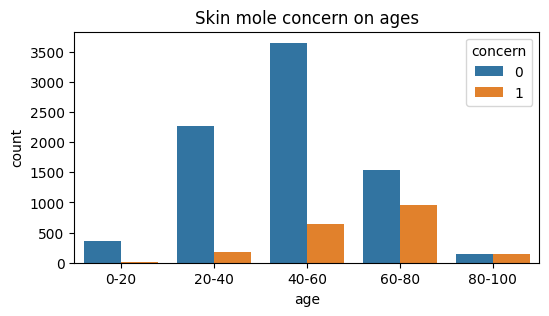

In [9]:
fig = plt.figure(figsize=(6,3))
sns.countplot(x=df["age_bin"], hue=df['concern'])
plt.title('Skin mole concern on ages')
plt.xlabel('age')

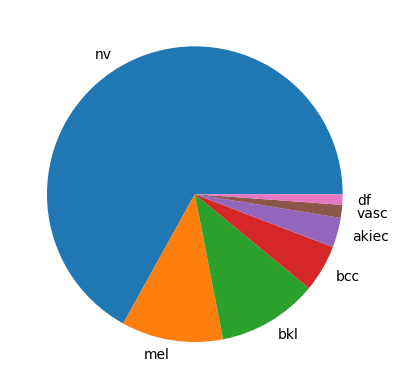

In [17]:
group_counts = df['dx'].value_counts()

plt.pie(group_counts.values, labels=group_counts.index)
plt.show()

Text(0.5, 0, 'Gender')

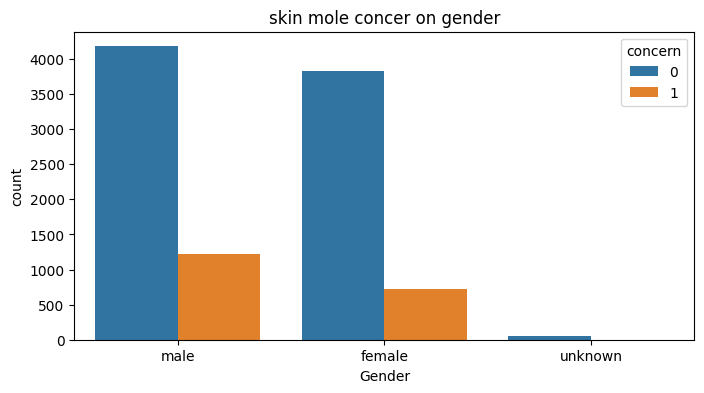

In [10]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=df["sex"], hue=df['concern'])
plt.title('skin mole concer on gender')
plt.xlabel('Gender')

Text(0.5, 0, 'localization')

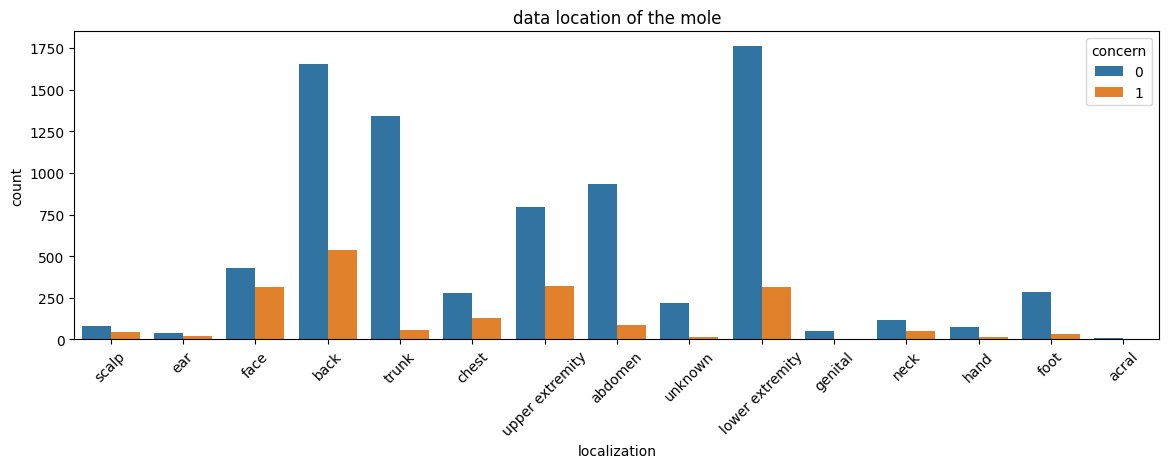

In [11]:
fig = plt.figure(figsize=(14,4))
sns.countplot(x=df["localization"], hue=df['concern'])
plt.title('data location of the mole')
plt.xticks(rotation=45)
plt.xlabel('localization')

([<matplotlib.patches.Wedge at 0x1e93a6a0430>,
 [Text(-0.5584449921517871, 0.9477020580016646, 'nv'),
  Text(-0.1716518532393207, -1.0865245700302901, 'mel'),
  Text(0.5628980664574734, -0.9450638956062377, 'bkl'),
  Text(0.9504061364471251, -0.5538304576345081, 'bcc'),
  Text(1.061943212107254, -0.2868390040760285, 'akiec'),
  Text(1.0925191098670717, -0.12807027201994092, 'vasc'),
  Text(1.0992843374552814, -0.039672981051378356, 'df')],
 [Text(-0.3046063593555202, 0.5169283952736352, '66.9%\n6705'),
  Text(-0.09362828358508402, -0.5926497654710673, '11.1%\n1113'),
  Text(0.30703530897680364, -0.5154893976034024, '11.0%\n1099'),
  Text(0.5184033471529773, -0.3020893405279135, '5.1%\n514'),
  Text(0.5792417520585021, -0.15645763858692463, '3.3%\n327'),
  Text(0.5959195144729481, -0.06985651201087686, '1.4%\n142'),
  Text(0.5996096386119717, -0.021639807846206376, '1.1%\n115')])

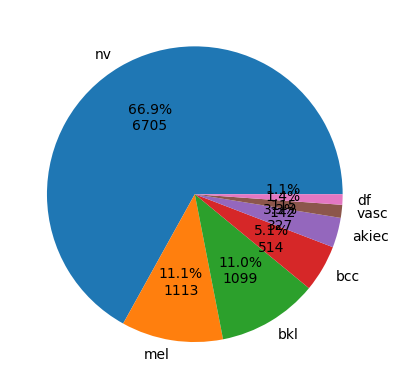

In [12]:
total = df['dx'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['dx'].value_counts().values, labels=df['dx'].value_counts().index, autopct=fmt)
